In [1]:
%matplotlib notebook

import os
import sys
import time

import numpy as np
import pandas as pd
import qgrid
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import warnings
import madmom
from madmom.features.beats import DBNBeatTrackingProcessor
from madmom.features.beats import RNNBeatProcessor

import IPython.display as ipd
from librosa import clicks
from scipy.io import wavfile

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from python.post_processing import activations2beats
from python.models import TCN_Davies
from python.utils import *
from python.evaluation import *

In [2]:
data = pd.read_csv('../data/data.csv', index_col=0)
performance = pd.read_csv('../data/performance.csv', index_col=0)

print('Torch version: {}'.format(torch.__version__))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device: %s' % (device))

Torch version: 1.1.0
Device: cpu


In [4]:
nhid = 16
levels = 10
kernel_size = 5
dropout = 0.1

model = TCN_Davies(nhid, levels, kernel_size, dropout)
model = nn.DataParallel(model)
model.load_state_dict(torch.load('../models/TCN_Davies_1202_0.17.pt', map_location=device))
model.eval();

In [32]:
idx = 790

<IPython.core.display.Javascript object>


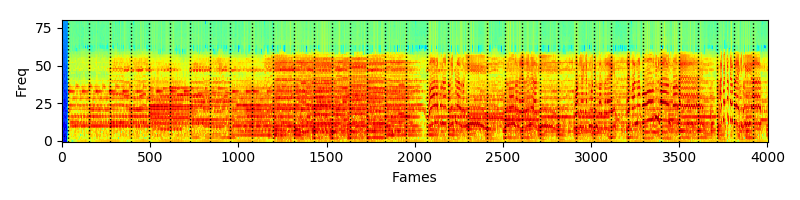

In [34]:
# Show input

input = get_input(idx)
annotations = get_annotations(idx)

plt.figure(figsize=(8,2))
plt.imshow(np.array(input).T, origin='lower', aspect='auto',cmap='jet');
# plt.colorbar(format='%.1f');
plt.xlabel('Fames');
plt.ylabel('Freq');
for ann in annotations:
    plt.axvline(x=ann*100, color='k', linestyle=':', linewidth=1)
plt.tight_layout();

<IPython.core.display.Javascript object>


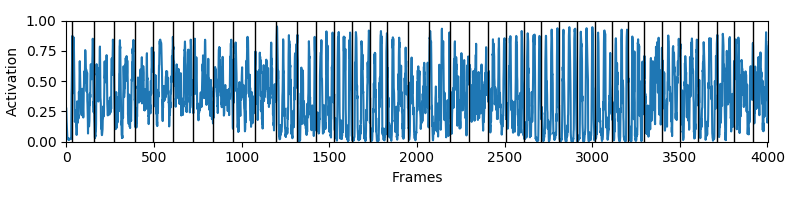

In [35]:
show_activations(idx, model, 'TCN_Davies', show_annotations=True, show_predictions=False)

In [33]:
idx = 2325

In [34]:
play_predictions(idx, 'TCN_Davies')

/Users/juliusrichter/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [80]:
play_predictions(idx, 'madmom')

In [81]:
play_annotations(idx)

In [5]:
qgrid.show_grid(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [6]:
qgrid.show_grid(performance)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [83]:
# Update Performance Benchmark

performance.at[0,'name'] = 'Ballroom'
performance.at[0,'dataset'] = ' '
performance.at[0,'F-measure'] = ' '
performance.at[0,'CMLc'] = ' '
performance.at[0,'CMLt'] = ' '
performance.at[0,'AMLc'] = ' '
performance.at[0,'AMLt'] = ' '
performance.at[0,'D'] = ' '

performance.at[1,'name'] = 'TCN'
performance.at[1,'dataset'] = 1
performance.at[1,'F-measure'] = '{:.3f}'.format(np.mean(data['f_TCN'][data['data_set'] == 1]))
performance.at[1,'CMLc'] = '{:.3f}'.format(np.mean(data['Cc_TCN'][data['data_set'] == 1]))
performance.at[1,'CMLt'] = '{:.3f}'.format(np.mean(data['Ct_TCN'][data['data_set'] == 1]))
performance.at[1,'AMLc'] = '{:.3f}'.format(np.mean(data['Ac_TCN'][data['data_set'] == 1]))
performance.at[1,'AMLt'] = '{:.3f}'.format(np.mean(data['At_TCN'][data['data_set'] == 1]))
performance.at[1,'D'] = '{:.3f}'.format(np.mean(data['D_TCN'][data['data_set'] == 1]))

performance.at[2,'name'] = 'Madmom'
performance.at[2,'dataset'] = 1
performance.at[2,'F-measure'] = '{:.3f}'.format(np.mean(data['f_mad'][data['data_set'] == 1]))
performance.at[2,'CMLc'] = '{:.3f}'.format(np.mean(data['Cc_mad'][data['data_set'] == 1]))
performance.at[2,'CMLt'] = '{:.3f}'.format(np.mean(data['Ct_mad'][data['data_set'] == 1]))
performance.at[2,'AMLc'] = '{:.3f}'.format(np.mean(data['Ac_mad'][data['data_set'] == 1]))
performance.at[2,'AMLt'] = '{:.3f}'.format(np.mean(data['At_mad'][data['data_set'] == 1]))
performance.at[2,'D'] = '{:.3f}'.format(np.mean(data['D_mad'][data['data_set'] == 1]))


performance.at[3,'name'] = 'SMC'
performance.at[3,'dataset'] = ' '
performance.at[3,'F-measure'] = ' '
performance.at[3,'CMLc'] = ' '
performance.at[3,'CMLt'] = ' '
performance.at[3,'AMLc'] = ' '
performance.at[3,'AMLt'] = ' '
performance.at[3,'D'] = ' '

performance.at[4,'name'] = 'TCN'
performance.at[4,'dataset'] = 2
performance.at[4,'F-measure'] = '{:.3f}'.format(np.mean(data['f_TCN'][data['data_set'] == 2]))
performance.at[4,'CMLc'] = '{:.3f}'.format(np.mean(data['Cc_TCN'][data['data_set'] == 2]))
performance.at[4,'CMLt'] = '{:.3f}'.format(np.mean(data['Ct_TCN'][data['data_set'] == 2]))
performance.at[4,'AMLc'] = '{:.3f}'.format(np.mean(data['Ac_TCN'][data['data_set'] == 2]))
performance.at[4,'AMLt'] = '{:.3f}'.format(np.mean(data['At_TCN'][data['data_set'] == 2]))
performance.at[4,'D'] = '{:.3f}'.format(np.mean(data['D_TCN'][data['data_set'] == 2]))

performance.at[5,'name'] = 'Madmom'
performance.at[5,'dataset'] = 2
performance.at[5,'F-measure'] = '{:.3f}'.format(np.mean(data['f_mad'][data['data_set'] == 2]))
performance.at[5,'CMLc'] = '{:.3f}'.format(np.mean(data['Cc_mad'][data['data_set'] == 2]))
performance.at[5,'CMLt'] = '{:.3f}'.format(np.mean(data['Ct_mad'][data['data_set'] == 2]))
performance.at[5,'AMLc'] = '{:.3f}'.format(np.mean(data['Ac_mad'][data['data_set'] == 2]))
performance.at[5,'AMLt'] = '{:.3f}'.format(np.mean(data['At_mad'][data['data_set'] == 2]))
performance.at[5,'D'] = '{:.3f}'.format(np.mean(data['D_mad'][data['data_set'] == 2]))


performance.at[6,'name'] = 'Hainsworth'
performance.at[6,'dataset'] = ' '
performance.at[6,'F-measure'] = ' '
performance.at[6,'CMLc'] = ' '
performance.at[6,'CMLt'] = ' '
performance.at[6,'AMLc'] = ' '
performance.at[6,'AMLt'] = ' '
performance.at[6,'D'] = ' '

performance.at[7,'name'] = 'TCN'
performance.at[7,'dataset'] = 3
performance.at[7,'F-measure'] = '{:.3f}'.format(np.mean(data['f_TCN'][data['data_set'] == 3]))
performance.at[7,'CMLc'] = '{:.3f}'.format(np.mean(data['Cc_TCN'][data['data_set'] == 3]))
performance.at[7,'CMLt'] = '{:.3f}'.format(np.mean(data['Ct_TCN'][data['data_set'] == 3]))
performance.at[7,'AMLc'] = '{:.3f}'.format(np.mean(data['Ac_TCN'][data['data_set'] == 3]))
performance.at[7,'AMLt'] = '{:.3f}'.format(np.mean(data['At_TCN'][data['data_set'] == 3]))
performance.at[7,'D'] = '{:.3f}'.format(np.mean(data['D_TCN'][data['data_set'] == 3]))


performance.at[8,'name'] = 'Madmom'
performance.at[8,'dataset'] = 3
performance.at[8,'F-measure'] = '{:.3f}'.format(np.mean(data['f_mad'][data['data_set'] == 3]))
performance.at[8,'CMLc'] = '{:.3f}'.format(np.mean(data['Cc_mad'][data['data_set'] == 3]))
performance.at[8,'CMLt'] = '{:.3f}'.format(np.mean(data['Ct_mad'][data['data_set'] == 3]))
performance.at[8,'AMLc'] = '{:.3f}'.format(np.mean(data['Ac_mad'][data['data_set'] == 3]))
performance.at[8,'AMLt'] = '{:.3f}'.format(np.mean(data['At_mad'][data['data_set'] == 3]))
performance.at[8,'D'] = '{:.3f}'.format(np.mean(data['D_mad'][data['data_set'] == 3]))
                                                              
                                                              
performance.at[9,'name'] = 'GTZAN'
performance.at[9,'dataset'] = ' '
performance.at[9,'F-measure'] = ' '
performance.at[9,'CMLc'] = ' '
performance.at[9,'CMLt'] = ' '
performance.at[9,'AMLc'] = ' '
performance.at[9,'AMLt'] = ' '
performance.at[9,'D'] = ' '

performance.at[10,'name'] = 'TCN'
performance.at[10,'dataset'] = 4
performance.at[10,'F-measure'] = '{:.3f}'.format(np.mean(data['f_TCN'][data['data_set'] == 4]))
performance.at[10,'CMLc'] = '{:.3f}'.format(np.mean(data['Cc_TCN'][data['data_set'] == 4]))
performance.at[10,'CMLt'] = '{:.3f}'.format(np.mean(data['Ct_TCN'][data['data_set'] == 4]))
performance.at[10,'AMLc'] = '{:.3f}'.format(np.mean(data['Ac_TCN'][data['data_set'] == 4]))
performance.at[10,'AMLt'] = '{:.3f}'.format(np.mean(data['At_TCN'][data['data_set'] == 4]))
performance.at[10,'D'] = '{:.3f}'.format(np.mean(data['D_TCN'][data['data_set'] == 4]))

performance.at[11,'name'] = 'Madmom'
performance.at[11,'dataset'] = 4
performance.at[11,'F-measure'] = '{:.3f}'.format(np.mean(data['f_mad'][data['data_set'] == 4]))
performance.at[11,'CMLc'] = '{:.3f}'.format(np.mean(data['Cc_mad'][data['data_set'] == 4]))
performance.at[11,'CMLt'] = '{:.3f}'.format(np.mean(data['Ct_mad'][data['data_set'] == 4]))
performance.at[11,'AMLc'] = '{:.3f}'.format(np.mean(data['Ac_mad'][data['data_set'] == 4]))
performance.at[11,'AMLt'] = '{:.3f}'.format(np.mean(data['At_mad'][data['data_set'] == 4]))
performance.at[11,'D'] = '{:.3f}'.format(np.mean(data['D_mad'][data['data_set'] == 4]))                                                             

In [84]:
performance.to_csv('../data/performance.csv')

## Calculate predictions and loss

In [10]:
files = data['file'][data['data_set'] == 6]

loss_function = nn.NLLLoss(weight=torch.tensor([1., 70.], dtype=torch.double).to(device))

start = time.time()
for i, file in enumerate(files):
    idx = files.index[i]
    _, dataset = index_to_file(idx)

    print('Evaluate file {} of {}'.format(i+1, len(files)), end="\r")

    input = get_input(idx)
#     label = get_labels(idx)

    with torch.no_grad():        
        out = model(input.view(1, len(input),-1))
#         loss = loss_function(out, label.view(1, len(label)))
        
#     data.at[idx,'loss'] = loss.item()

    activations = np.exp(np.array(out[0,1,:]))

    pred_beats = activations2beats(activations)

    np.savetxt('../data/predictions/TCN_Davies/{}/{}.beats'.format(dataset, file), pred_beats, fmt='%.2f ')
end = time.time()
print('\nElapsed time: {:d} min and {:d} s'.format(np.int((end - start)/60), np.int((end - start) % 60)))

Evaluate file 26 of 26
Elapsed time: 0 min and 12 s


## F Measure

In [71]:
files = data['file'][data['data_set'] == 3]

start = time.time()
for i, file in enumerate(files):
    idx = files.index[i]      
    print("Progress file {:d} of {:d}".format(i+1, len(files)), end="\r")
    
    annotations = get_annotations(idx)
    predictions = get_predictions(idx, subfolder='madmom')
        
    data.at[idx,'f_mad'] = fmeasure(predictions, annotations)
     
end = time.time()
print('\nElapsed time: {:d} min and {:d} s'.format(np.int((end - start)/60), np.int((end - start) % 60)))

Progress file 222 of 222
Elapsed time: 0 min and 6 s


## Continuity measures

In [8]:
files = data['file'][data['data_set'] != 5]

start = time.time()
for i, file in enumerate(files):
    idx = files.index[i]
    
    print("Progress file {:d} of {:d}".format(i+1, len(files)), end="\r")
    
    annotations = get_annotations(idx)
    predictions = get_predictions(idx, subfolder='madmom')
    
    cmlc, cmlt, amlc, amlt = continuity(predictions, annotations)
        
    data.at[idx, 'Cc_mad'] = cmlc
    data.at[idx, 'Ct_mad'] = cmlt
    data.at[idx, 'Ac_mad'] = amlc
    data.at[idx, 'At_mad'] = amlt
     
end = time.time()
print('\nElapsed time: {:d} min and {:d} s'.format(np.int((end - start)/60), np.int((end - start) % 60)))

Progress file 2136 of 2136
Elapsed time: 0 min and 8 s


## Information gain

In [9]:
files = data['file'][data['data_set'] != 5]

start = time.time()
for i, file in enumerate(files):
    idx = files.index[i]
    
    print("Progress file {:d} of {:d}".format(i+1, len(files)), end="\r")
    
    annotations = get_annotations(idx)
    predictions = get_predictions(idx, subfolder='madmom')
    
    D, _ = information_gain(predictions, annotations)
        
    data.at[idx, 'D_mad'] = D
    
end = time.time()
print('\nElapsed time: {:d} min and {:d} s'.format(np.int((end - start)/60), np.int((end - start) % 60)))

/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (39) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (37) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (35) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (38) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (22) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (31) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (28) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (34) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (36) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return np.abs(1 - (errors / annotations[matches]))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (25) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:496: RuntimeWarning: invalid value encountered in true_divide
  return np.abs(1 - (errors / annotations[matches]))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (32) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (27) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (24) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (23) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (26) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (29) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (21) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (33) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (30) for 40 histogram bins.
  % (len(annotations), num_bins))


/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (20) for 40 histogram bins.
  % (len(annotations), num_bins))
/Users/juliusrichter/Documents/Uni/Masterarbeit/beat_tracker/python/evaluation.py:434: UserWarning: Not enough beat annotations (19) for 40 histogram bins.
  % (len(annotations), num_bins))


Progress file 2136 of 2136
Elapsed time: 0 min and 8 s


## Calculate loss

In [35]:
files = data['file'][data['data_set'] != 5]

loss_function = nn.NLLLoss(weight=torch.tensor([1., 70.], dtype=torch.double).to(device))

start = time.time()
for i, file in enumerate(files):
        idx = files.index[nr]
    _, dataset = index_to_file(idx)

    print('Evaluate file {} of {}'.format(nr+1, len(files)), end="\r")

    input = get_input(idx)
    label = get_labels(idx)

    print('Evaluate file {} of {}'.format(i+1, len(files)), end="\r")

    input = get_input(idx)
    label = get_labels(idx)

    with torch.no_grad():        
        out = model(input.view(1, len(input),-1))
        loss = loss_function(out, label.view(1, len(label)))

    data.at[idx,'loss'] = loss.item()

end = time.time()
print('\nElapsed time: {:d} min and {:d} s'.format(np.int((end - start)/60), np.int((end - start) % 60)))

Evaluate file 2137 of 2137
Elapsed time: 6 min and 12 s


## P Score

In [14]:
files = data['file']
start = time.time()
for i, file in enumerate(files):
    idx = files.index[i]
    
    print("Progress file {:d} of {:d}".format(i+1, len(files)), end="\r")
    
    annotations = get_annotations(data.at[idx,'file'])
    predictions = get_predictions(data.at[idx,'file'], subfolder='lstm')
        
    data.at[i,'p_lstm'] = pscore(predictions, annotations)
     
end = time.time()
print('\nElapsed time: {:d} min and {:d} s'.format(np.int((end - start)/60), np.int((end - start) % 60)))

Progress file 915 of 915
Elapsed time: 0 min and 4 s


## Madmom results

In [34]:
files = data['file'][data['data_set'] == 4][886:]

proc = DBNBeatTrackingProcessor(fps=100)

start = time.time()
for i, file in enumerate(files):
    idx = files.index[i]
    _, dataset = index_to_file(idx)
    
    print('Evaluate file {} of {}'.format(i+1, len(files)), end="\r")

    act = RNNBeatProcessor()('../data/audio/{}/{}.wav'.format(dataset, file))
    pred_beats = proc(act)

    np.savetxt('../data/predictions/madmom/{}/{}.beats'.format(dataset, file),
               pred_beats,  fmt='%.2f ')
    
end = time.time()
print('\nElapsed time: {:d} min and {:d} s'.format(np.int((end - start)/60), np.int((end - start) % 60)))

Evaluate file 113 of 113
Elapsed time: 23 min and 17 s


In [31]:
qgrid.show_grid(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Save data

In [82]:
data.to_csv('../data/data.csv')

In [47]:
performance.to_csv('../data/performance.csv')